In [1]:
# https://www.kaggle.com/muonneutrino/exploration-transforming-images-in-python
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_json("./input/train.json")
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

In [6]:
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [7]:
def get_stats(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]

    return train
train = get_stats(train,1)
train = get_stats(train,2)

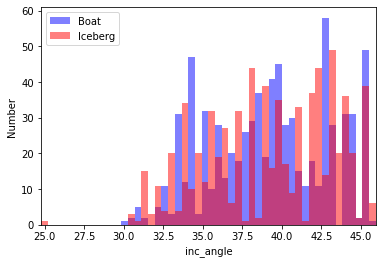

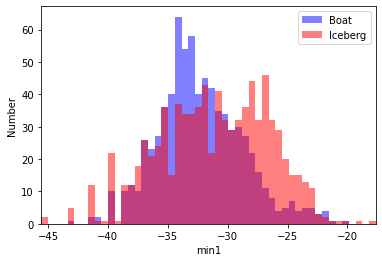

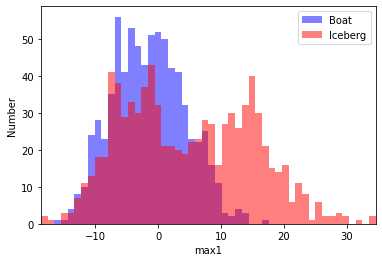

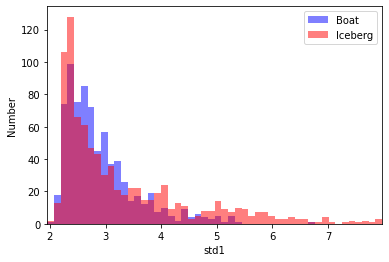

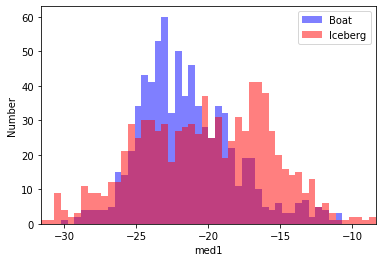

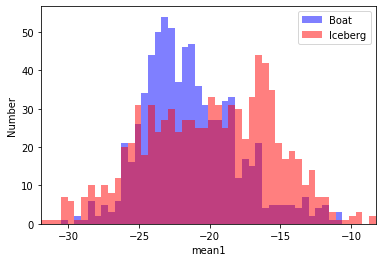

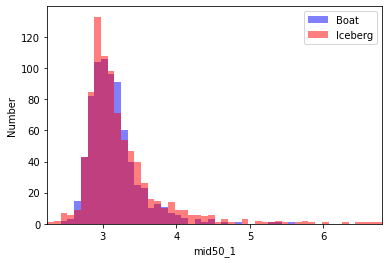

In [9]:
def plot_var(name, nbins=50):
    minval = train[name].min()
    maxval = train[name].max()
    plt.hist(train.loc[train.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.5,label='Boat')
    plt.hist(train.loc[train.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='r',alpha=0.5,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name),
    plt.ylabel('Number')
    plt.show()
for col in ['inc_angle','min1','max1','std1','med1','mean1','mid50_1']:
    plot_var(col)

In [12]:
# correlation b/w feature
train_stats = train.drop(['id','is_iceberg','band_1','band_2'],axis=1)
train_stats.head()

,inc_angle,max1,maxpos1,min1,minpos1,med1,std1,mean1,p25_1,p75_1,...,max2,maxpos2,min2,minpos2,med2,std2,mean2,p25_2,p75_2,mid50_2
0,43.9239,-0.213149,2735,-38.211376,2404,-27.879921,2.764537,-27.911043,-29.539108,-26.487118,...,-11.252153,2810,-41.135918,3125,-30.007847,2.381284,-29.910117,-31.591387,-28.267622,3.323765
1,38.1562,12.570409,2956,-23.125309,3841,-13.654199,3.142532,-13.566554,-15.333844,-12.128263,...,0.044052,2957,-34.765831,4349,-25.486130,2.934098,-25.359106,-26.963490,-23.997253,2.966237
2,45.2859,-9.918477,2736,-33.391197,2268,-22.935019,2.223905,-23.053698,-24.604092,-21.533882,...,-15.605879,2661,-34.148819,1570,-24.606205,2.125275,-24.839821,-26.033436,-23.379602,2.653834
3,43.8306,4.795627,2664,-32.204136,1637,-23.303238,2.566233,-23.210771,-24.754293,-21.870052,...,-5.554516,2664,-39.564053,1346,-29.549923,2.389980,-29.567913,-31.042850,-28.276203,2.766647
4,35.6256,-6.956036,2585,-35.010487,4401,-25.206615,2.305288,-25.280029,-26.591318,-23.796333,...,-9.434006,2510,-40.276115,3815,-25.466921,2.276244,-25.627726,-26.895178,-24.017248,2.877930


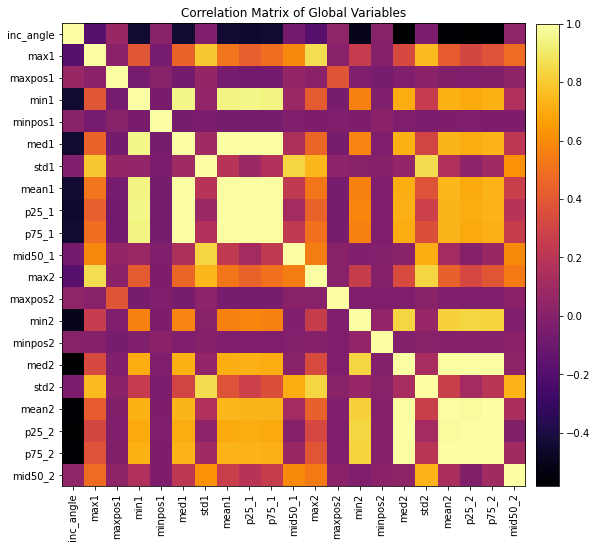

In [17]:
corr = train_stats.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(train_stats.columns))
plt.xticks(labels, train_stats.columns, rotation=90)
plt.yticks(labels, train_stats.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85, pad=0.02)
plt.show()

In [47]:
def plot_image(item,func=None):
    fig = plt.figure(1,figsize=(15,15))
    for i in range(6):
        ax = fig.add_subplot(2,3,i+1)
        if i < 3:
            arr = np.reshape(np.array(item.iloc[i]['band_1']),(75,75))
            if func is not None:
                arr = func(arr)
        else :
            arr = np.reshape(np.array(item.iloc[i-3]['band_2']),(75,75))
            if func is not None:
                arr = func(arr)
        ax.imshow(arr,cmap='inferno')
    plt.show()

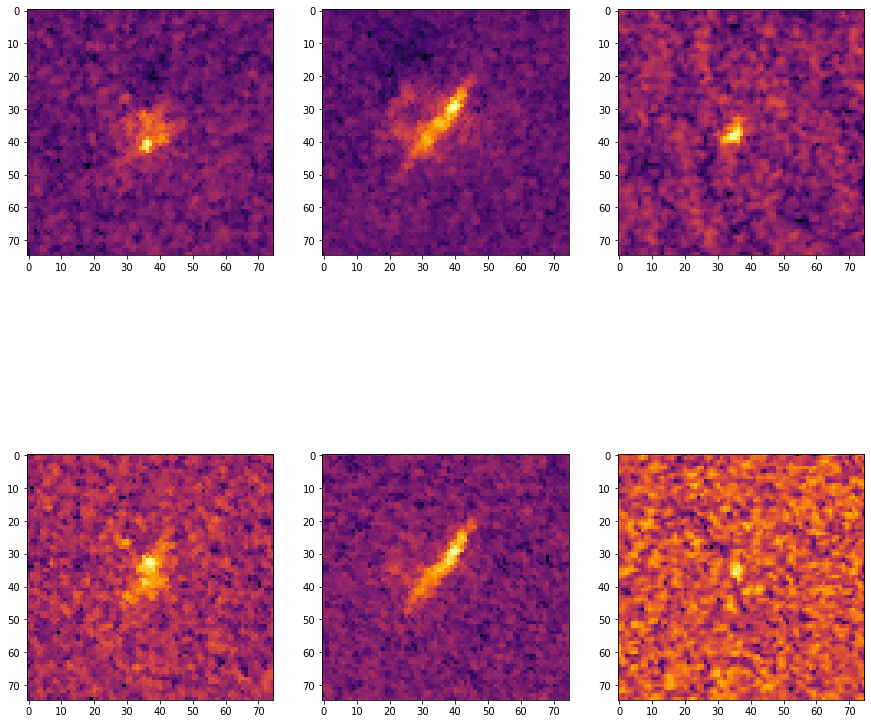

In [48]:
icebergs = train[train.is_iceberg==1].sample(n=3, random_state=123)
ships = train[train.is_iceberg==0].sample(n=3, random_state=123)

# icebergs band_1 & band_2
plot_image(icebergs)

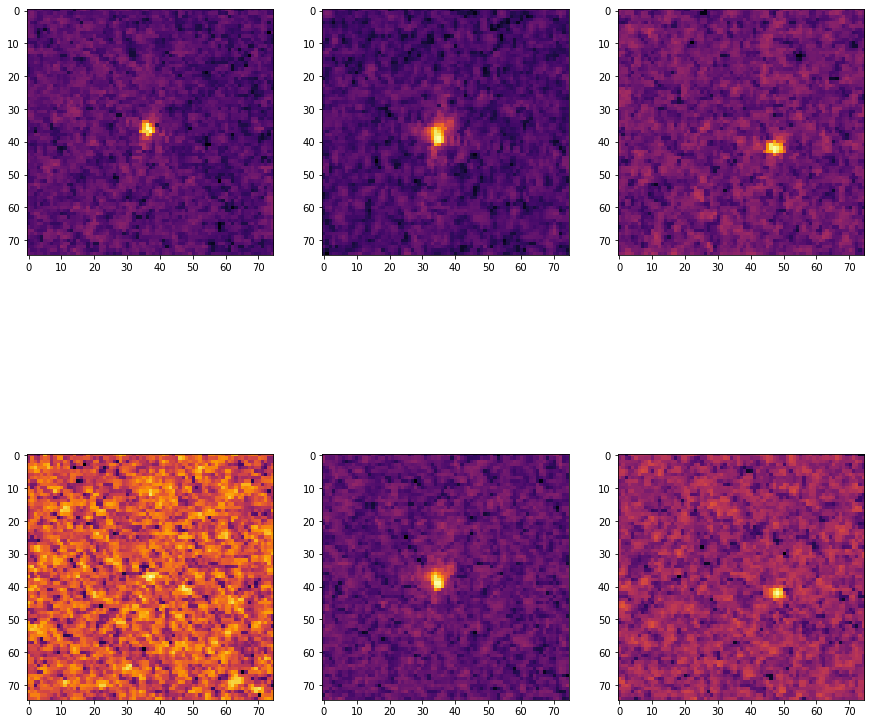

In [44]:
plot_image(ships)

In [40]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

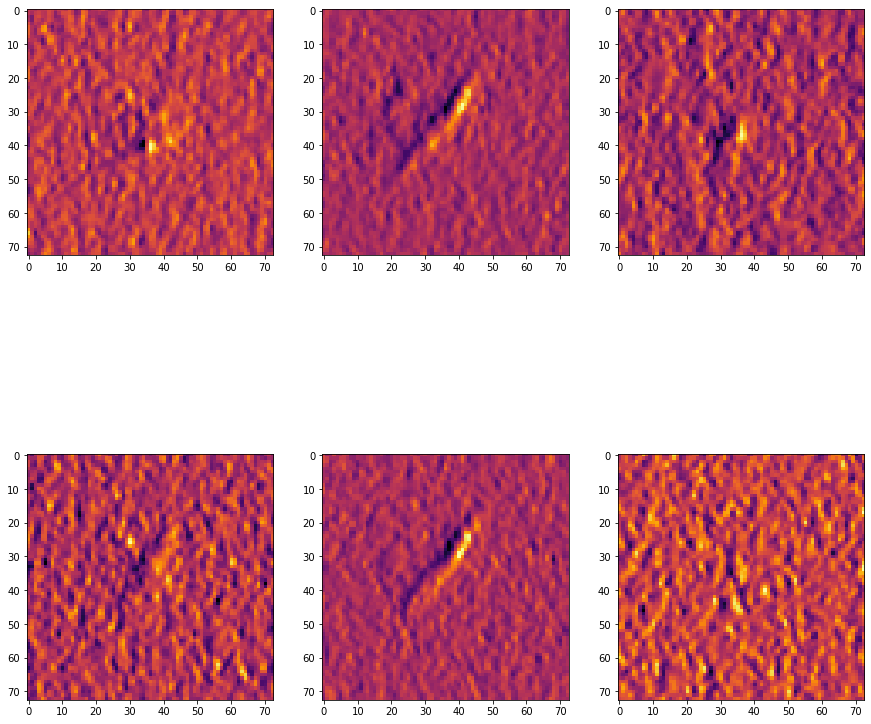

In [50]:
def get_derivative(image):
    return signal.convolve2d(image,xder,mode='valid')
plot_image(icebergs,get_derivative)

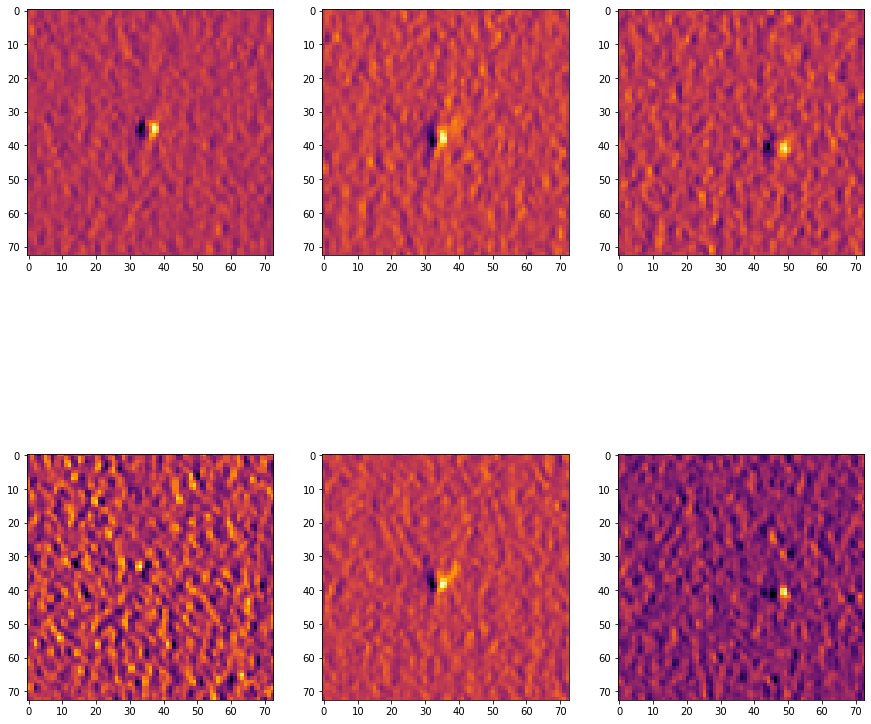

In [51]:
plot_image(ships,get_derivative)

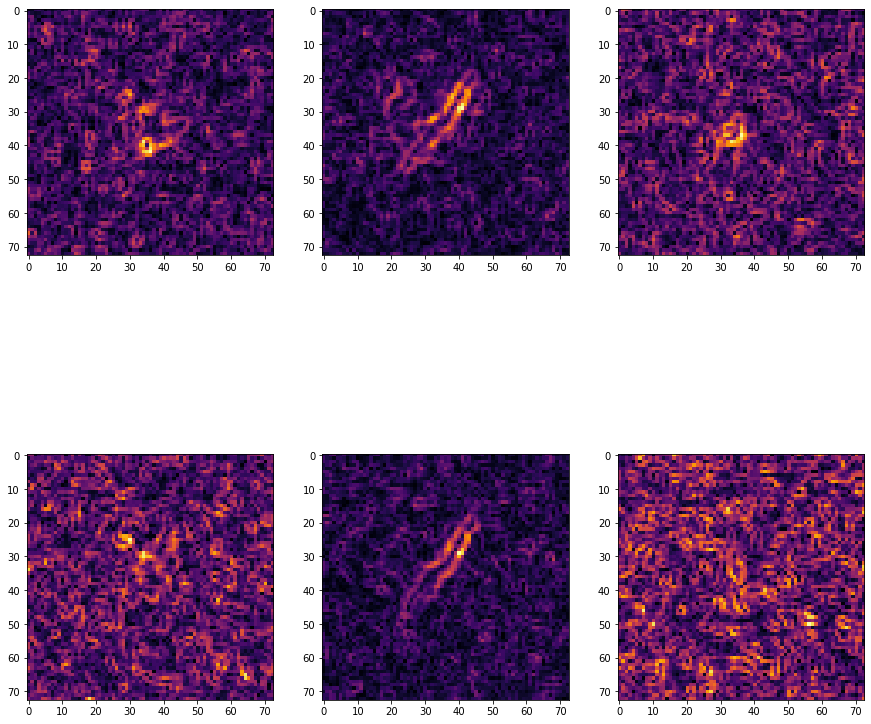

In [52]:
def get_gradient_magnitude(item):
    arrx = signal.convolve2d(item,xder,mode='valid')
    arry = signal.convolve2d(item,yder,mode='valid')
    return np.hypot(arrx,arry)
plot_image(icebergs,get_gradient_magnitude)

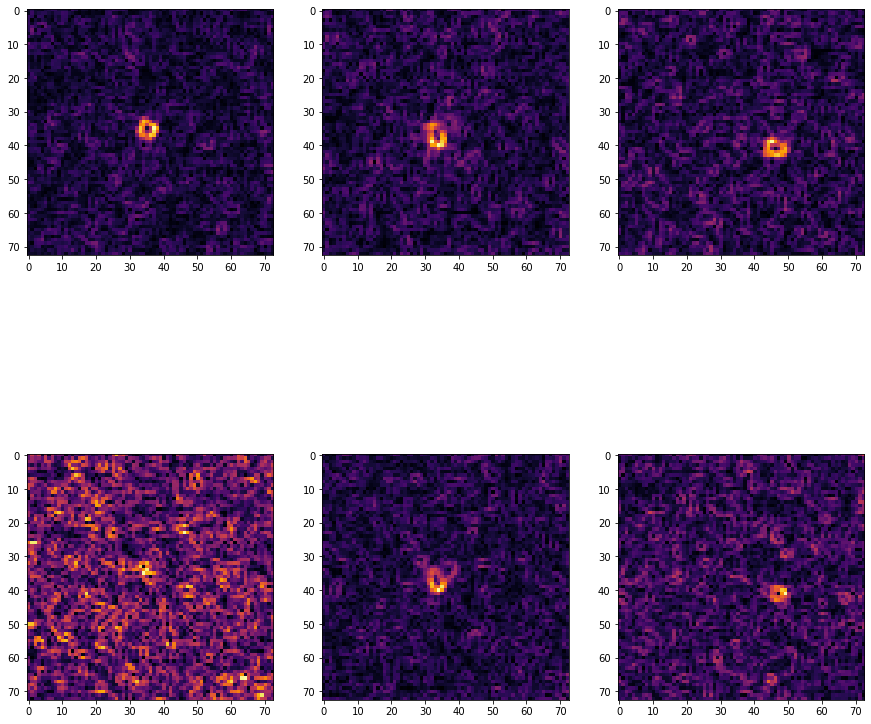

In [53]:
plot_image(ships,get_gradient_magnitude)

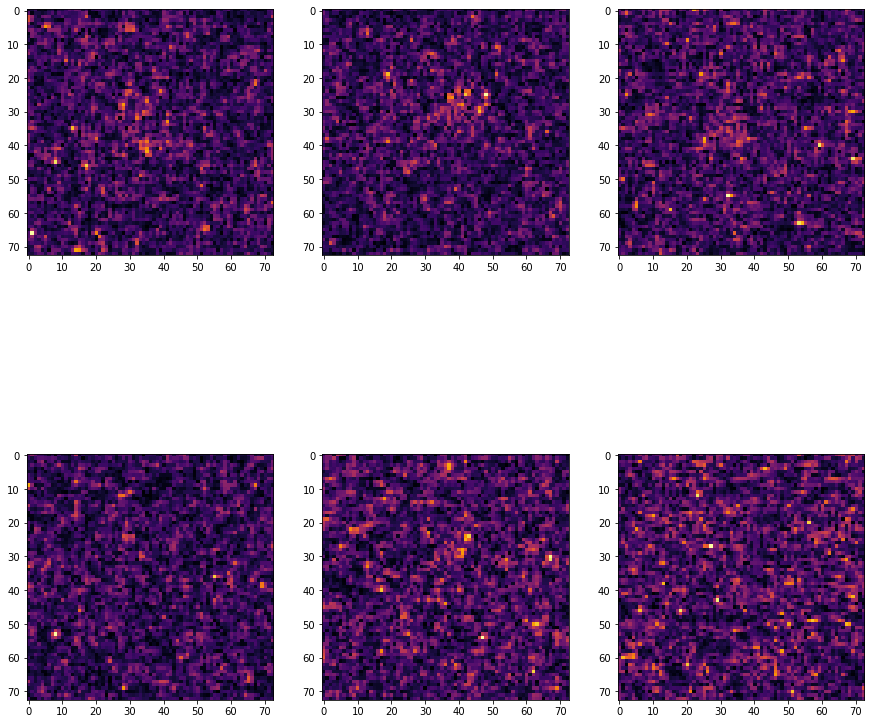

In [54]:
def laplacian(item):
    arrx = signal.convolve2d(item,xder2,mode='valid')
    arry = signal.convolve2d(item,yder2,mode='valid')
    return np.hypot(arrx,arry)
plot_image(icebergs,laplacian)

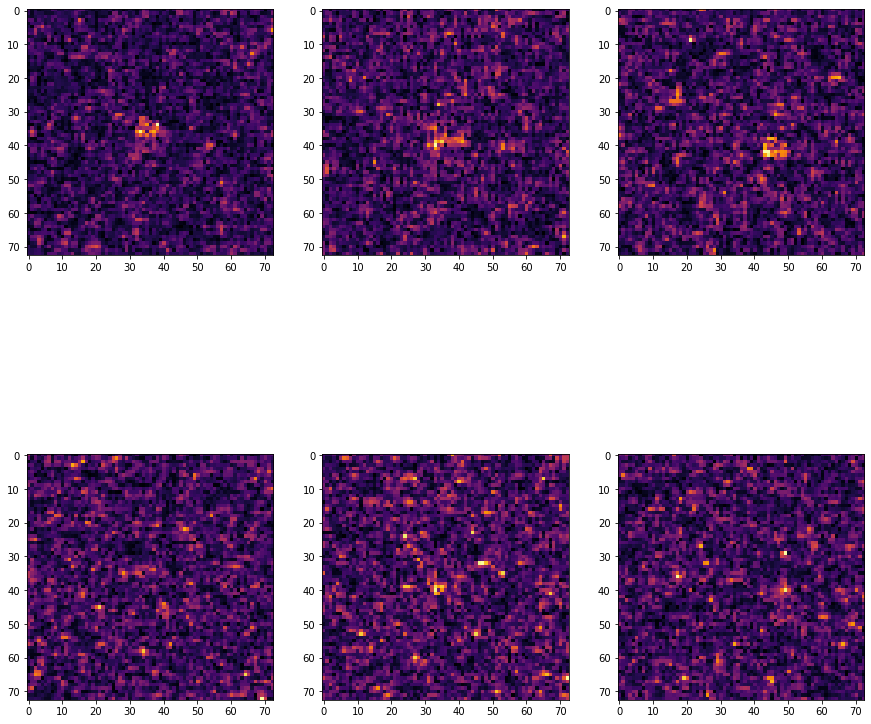

In [55]:
plot_image(ships,laplacian)

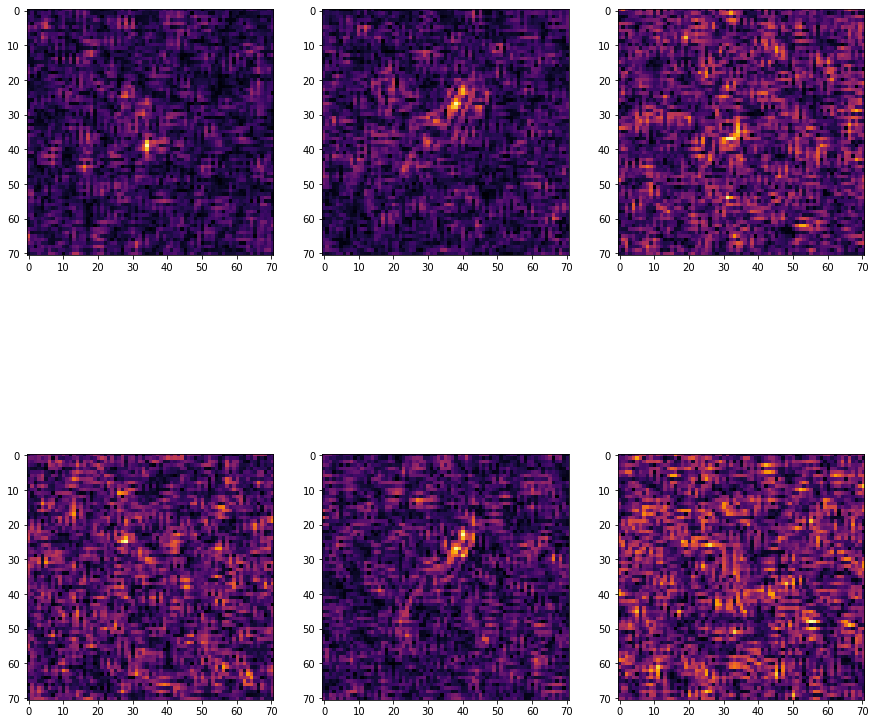

In [56]:
def magnitude_curl_gradient(item):
    xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    arrx = signal.convolve2d(item,xder,mode='valid')
    arry = signal.convolve2d(item,yder,mode='valid')
    arrx = signal.convolve2d(arrx,xder,mode='valid')
    arry = signal.convolve2d(arry,yder,mode='valid')
    return np.hypot(arrx,arry)
plot_image(icebergs,magnitude_curl_gradient)